# **Flight Fare Predictor**

[Dataset](https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/)

# EDA + Preprocessing

**MOTIVE** : To predict price of flight given the airline, date of journey, departure time, arrival time, total stops, source and destination. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Flight_Data.xlsx", sheet_name='Sheet1')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.shape

(10683, 11)

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().values.any()

False

**Data Cleaning**


1.   Formatting Arival Time and Departure time uniformly + numerically
2.   Applying datetime to Date of Journey
3.   Converting duration -> number of minutes
4. Exploring Additional Info 
5. Handling columns that contain categorical values



In [9]:
df['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [10]:
df['Arrival_Time'].str.len()

0        12
1         5
2        12
3         5
4         5
         ..
10678     5
10679     5
10680     5
10681     5
10682     5
Name: Arrival_Time, Length: 10682, dtype: int64

In [11]:
df['Arrival_Time'].str.len().nunique()

2

In [12]:
df['Arrival_Time'].str.len().unique()

array([12,  5])

We need values only upto length of 5 as we don't want Date and Month in this column.

In [13]:
 pd.options.mode.chained_assignment = None

In [14]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Now, we can convert Departure Time and Arrival Time from to datetime and extract the hour and minute value respectively.



In [16]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [17]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,8,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,11,30,14,10


Now we can drop the original Departure and Arrival times.

In [18]:
df.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [19]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,8,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,11,30,14,10


Similarly, even Date of Journey needs to be converted to datetime.

In [20]:
df['Date_of_Journey'].str.split('/').str[2].unique()

array(['2019'], dtype=object)

The data has only been recorded for the year of 2019, therefore we will only extract the date and month.

In [21]:
df['Day_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day
df['Month_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [22]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,19,55,22,25,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,20,45,23,20,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,8,20,11,20,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,11,30,14,10,1,3


In [23]:
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [24]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,19,55,22,25,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,20,45,23,20,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,8,20,11,20,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,11,30,14,10,1,3


In [25]:
df[['Duration_hour','Duration_min']] = df.Duration.str.split(" ",expand=True)

In [26]:
df['Duration_hour'] = df['Duration_hour'].str.extract('(\d+)', expand=False)
df['Duration_min'] = df['Duration_min'].str.extract('(\d+)', expand=False)

In [27]:
df.drop(['Duration'], axis=1, inplace=True)

In [28]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,9,6,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,1,3,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,19,55,22,25,9,4,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,20,45,23,20,27,4,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,8,20,11,20,27,4,3,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,11,30,14,10,1,3,2,40


Replace NaN values in Duration_min to 00, and convert Duration into mins

In [29]:
df['Duration_min'] = df['Duration_min'].fillna(0)

In [30]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,1,3,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,19,55,22,25,9,4,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,20,45,23,20,27,4,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,8,20,11,20,27,4,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,11,30,14,10,1,3,2,40


In [31]:
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_min'] = df['Duration_min'].astype(int)

In [32]:
df['Duration_hour_conv'] = df['Duration_hour'].mul(60)

In [33]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey,Duration_hour,Duration_min,Duration_hour_conv
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,24,3,2,50,120
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,1,5,7,25,420
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,9,6,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,12,5,5,25,300
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,1,3,4,45,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,19,55,22,25,9,4,2,30,120
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,20,45,23,20,27,4,2,35,120
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,8,20,11,20,27,4,3,0,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,11,30,14,10,1,3,2,40,120


In [34]:
df['Duration'] = df['Duration_min'] + df['Duration_hour_conv']

In [35]:
df.drop(['Duration_min', 'Duration_hour', 'Duration_hour_conv'], axis=1, inplace=True)

In [36]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey,Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,24,3,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,1,5,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,9,6,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,12,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,1,3,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,19,55,22,25,9,4,150
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,20,45,23,20,27,4,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,8,20,11,20,27,4,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,11,30,14,10,1,3,160


In [37]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [38]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

As the majority of the data have no additional info, we can drop that column. 

Route is representing the same information as source + destination + stops so we can drop that too.

In [39]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [40]:
df

,Airline,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey,Duration
0,IndiGo,Banglore,New Delhi,non-stop,3897,22,20,1,10,24,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,5,50,13,15,1,5,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,25,4,25,9,6,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,18,5,23,30,12,5,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,16,50,21,35,1,3,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,19,55,22,25,9,4,150
10679,Air India,Kolkata,Banglore,non-stop,4145,20,45,23,20,27,4,155
10680,Jet Airways,Banglore,Delhi,non-stop,7229,8,20,11,20,27,4,180
10681,Vistara,Banglore,New Delhi,non-stop,12648,11,30,14,10,1,3,160


Handling categorical data:

As Airline, Source and Destination have no inherent ranking or order -> it is nominal data -> we use OneHotEncoder.


In [41]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [42]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [43]:
df.drop(df.loc[df['Airline']=='Trujet'].index, inplace=True)

In [44]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [45]:
Airline = df[["Airline"]]

In [46]:
Airline = pd.get_dummies(Airline, drop_first= True)

In [47]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,1,0


In [48]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [49]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

We can see that the model has treated Delhi and New Delhi as different value points.

In [50]:
df.Destination = df.Destination.replace('New Delhi', 'Delhi')

In [51]:
df.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [52]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

In [53]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

Total stops have an effect on price of flight -> ordinal data -> label encoder

In [54]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [55]:
data = pd.concat([df, Airline, Source, Destination], axis = 1)

In [56]:
data

,Airline,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey,Duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,0,3897,22,20,1,10,24,3,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,5,50,13,15,1,5,445,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,25,4,25,9,6,1140,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,18,5,23,30,12,5,325,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,1,13302,16,50,21,35,1,3,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,19,55,22,25,9,4,150,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,20,45,23,20,27,4,155,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,8,20,11,20,27,4,180,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10681,Vistara,Banglore,Delhi,0,12648,11,30,14,10,1,3,160,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [57]:
data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [58]:
data.shape

(10681, 27)

# **Train Test Split**



In [59]:
X = data.drop('Price',axis=1)
y = data['Price']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Model**

In [61]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
y_pred = model.predict(X_test)

In [63]:
model.score(X_test, y_test)

0.8183087272896985

In [64]:
import matplotlib.pyplot as plt

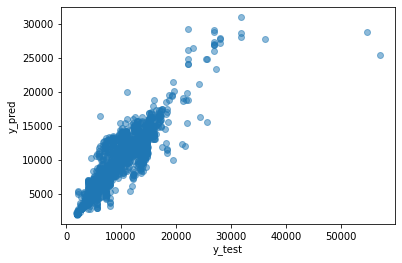

In [65]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# **Metrics**

In [66]:
from sklearn import metrics

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1170.4177358073996
MSE: 4021002.5187147013
RMSE: 2005.2437554359074


# **Hyperparameter Tuning**

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [70]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [71]:
rf_randomized = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_randomized.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [73]:
rf_randomized.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [74]:
model_tuned = RandomForestRegressor(max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 15, n_estimators = 700)

In [75]:
model_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
y_pred = model_tuned.predict(X_test)

In [77]:
model_tuned.score(X_test, y_test)

0.8396127058565905